# Econometrics - Week 3

In [2]:
import numpy as np
from scipy.stats import f
import seaborn as sns
import matplotlib.pyplot as plt

### 3.1.2. Пример построения интервалов для прогнозов [у доски]

Задачи:
- Построить прогноз цены для квартиры площадью 60 метров
- Построить 95% доверительный интервал для неизвестной средней стоимости квартиры площадью 60 м ** 2
- Построить 95% предиктивный интервал для фактической стоимости квартиры площадью 60 м ** 2

Условия задачи:

In [4]:
σ_sqr = 1154                        # Среднеквадратическое отклонение предсказаний оцениваемой модели
n_obs = 2040                        # Количество наблюдений, по которым оценивается модель
β_ = np.array([-62, 2.6])           # Коэффиеценты оцениваемой модели
var_β_ = np.array([[13.78, -0.18],  # Ковариационная матрица оцениваемой модели
                   [-0.18, 0.0025]]).T

Функция для рассчета:

In [26]:
def conf_int_pred(b_, var_b, area, sigma_sqr, level=0.95, round_fact=4):
    # Находим значение цены, предсказанное моделью
    price_ = b_[0] + b_[1] * area
    print("Предсказанное значение цены: %s" % (price_))
    # Оценка дисперсии значения, предсказанного моделью
    var_price = var_b[0, 0] + area ** 2 * var_b[1, 1] + 2 * area * var_b[0, 1]
    var_pred = sigma_sqr + var_price
    print("Дисперсия предсказания: %s" % (round(var_pred, round_fact)))
    # Строим нормальное распределение
    norm_dist = np.random.normal(loc=0., size=10000)
    # Находим критические значения
    q = level + (1 - level) / 2
    quantile = np.quantile(norm_dist, q=q)
    # Строим график и отмечаем критические значения
    print("Нормальное распределение:")
    sns.distplot(norm_dist)
    plt.plot([quantile, quantile], [0, 0.4], color="r")
    plt.plot([-quantile, -quantile], [0, 0.4], color="r")
    plt.show(block=False)
    # Находим доверительные интервалы для неизвестной средней стоимости
    conf_int_left = round(price_ - quantile * np.sqrt(var_price), round_fact)
    conf_int_right = round(price_ + quantile * np.sqrt(var_price), round_fact)
    
    print("Доверительный интервал для неизвестной средней стоимости: [%s < y_pred < %s]" % (conf_int_left, conf_int_right))
    # Находим доверительные интервалы для фактической стоимости
    conf_int_left_pred = round(price_ - quantile * np.sqrt(var_pred), round_fact)
    conf_int_right_pred = round(price_ + quantile * np.sqrt(var_pred), round_fact)
    
    print("Предиктивный интервал для фактической стоимости: [%s < y_pred < %s]" % (conf_int_left_pred, conf_int_right_pred))

Рассчет:

Предсказанное значение цены: 94.0
Нормальное распределение:


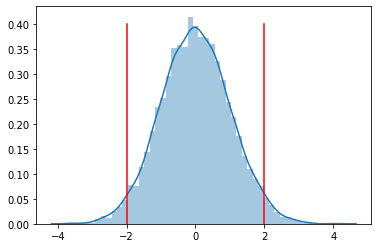

Доверительный интервал для неизвестной средней стоимости: [91.8438 < y_pred < 96.1562]
Предиктивный интервал для фактической стоимости: [26.535 < y_pred < 161.465]


In [22]:
conf_int_pred(β_, var_β_, 60, σ_sqr, level=0.95)

### 3.1.6. Пример проверки гипотезы о нескольких линейных ограничениях [у доски]

Задачи:
- Проверить гипотезу о равенстве нулю β_5_ и β_6_, при уровне значимости 0.95

Условия задачи:

In [15]:
n_obs = 2040                                                     # Количество наблюдений, по которым оценивается модель
βunr_ = np.array([-0.215, 0.83, 0.268, 0.196, 0.112, -0.01, 0.1])# Оценки коэффиецентов неограниченной модели
RSS_1 = 62.6                                                     # Сумма квадратов остатков неограниченной модели
βr_ = np.array([-0.261, 0.795, 0.309, 0.202, 0.13])              # Оценки коэффиецентов ограниченной модели
RSS_2 = 69.3                                                     # Сумма квадратов остатков ограниченной модели

Функция для рассчета:

In [15]:
def check_betas(b_unr, b_r, RSS_unr, RSS_r, n_obs, level=0.95, round_fact=4):
    # Находим кол-во ограничений модели
    r = len(b_unr) - len(b_r)
    # Находим значение F-статистики
    F = ((RSS_r - RSS_unr)/r)/(RSS_unr/(n_obs - len(b_unr)))
    # Строим F-распределение
    dfn, dfd = r, n_obs - len(b_unr)
    x = np.linspace(f.ppf(0., dfn, dfd), f.ppf(0.99, dfn, dfd), 1000)
    F_dist = f.pdf(x, dfn, dfd)
    # Находим критические значения
    F_crit = f.ppf(level, dfn, dfd)
    # Строим график и отмечаем критические значения
    print("F-распределение:")
    sns.lineplot(x, F_dist)
    plt.plot([F_crit, F_crit], [0, 1.], color="r")
    plt.show(block=False)
    
    if F > F_crit:
        print("Так как наблюдаемое значение F-статистики (%s) больше чем F-критическое(%s), то нулевая гипотеза отвергается." % (round(F, round_fact), round(F_crit, round_fact)))
    else:
        plt.plot([F, F], [0, 1.], color="b")
        print("Так как наблюдаемое значение F-статистики (%s) меньше чем F-критическое(%s), то нулевая гипотеза принимается." % (round(F, round_fact), round(F_crit, round_fact)))

Рассчет:

F-распределение:


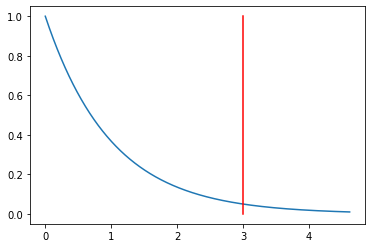

Так как наблюдаемое значение F-статистики (108.7947) больше чем F-критическое(3.0002), то нулевая гипотеза отвергается.


In [17]:
check_betas(βunr_, βr_, RSS_1, RSS_2, n_obs)

### 3.1.8. Пример проверки гипотезы о незначимости регрессии [+ доска]

Задачи:
- Проверить гипотезу о бесполезности всех регрессоров модели, при уровне значимости 0.95

Условия задачи:

In [18]:
n_obs = 3294                          # Количество наблюдений, по которым оценивается модель
βunr_ = np.array([-2.5, 0.6, 0.157])  # Оценки коэффиецентов неограниченной модели
βr_ = np.array([-2.5])                # Оценки коэффиецентов ограниченной модели
R2 = 0.09                             # R-квадрат неограниченной модели

Функция для рассчета:

In [19]:
def check_regr(b_, br_, R2, n_obs, level=0.95, round_fact=4):
    # Находим кол-во ограничений модели
    r = len(b_) - len(br_)
    # Находим значение F-статистики
    F = (R2 / r)/((1 - R2)/(n_obs - len(b_)))
    # Строим F-распределение
    dfn, dfd = r, n_obs - len(b_)
    x = np.linspace(f.ppf(0., dfn, dfd), f.ppf(0.99, dfn, dfd), 1000)
    F_dist = f.pdf(x, dfn, dfd)
    # Находим критические значения
    F_crit = f.ppf(level, dfn, dfd)
    # Строим график и отмечаем критические значения
    print("F-распределение:")
    sns.lineplot(x, F_dist)
    plt.plot([F_crit, F_crit], [0, 1.], color="r")
    plt.show(block=False)
    
    if F > F_crit:
        print("Так как наблюдаемое значение F-статистики (%s) больше чем F-критическое(%s), то нулевая гипотеза отвергается." % (round(F, round_fact), round(F_crit, round_fact)))
    else:
        plt.plot([F, F], [0, 1.], color="b")
        print("Так как наблюдаемое значение F-статистики (%s) меньше чем F-критическое(%s), то нулевая гипотеза принимается." % (round(F, round_fact), round(F_crit, round_fact)))

Рассчет:

F-распределение:


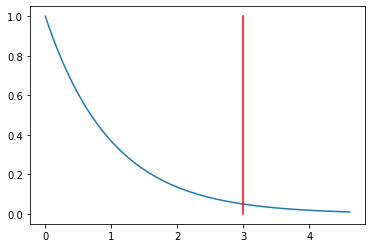

Так как наблюдаемое значение F-статистики (162.7418) больше чем F-критическое(2.9985), то нулевая гипотеза отвергается.


In [20]:
check_regr(βunr_, βr_, R2, n_obs)

### 3.1.10. Тест Рамсея [+ доска]

Задачи:
- Проверить гипотезу о том, что нет пропущенных регрессоров, при уровне значимости 0.95

Условия задачи:

In [3]:
n_obs = 3294                                        # Количество наблюдений, по которым оценивается модель
β_ = np.array([-2.5, 0.6, 0.16])                    # Оценки коэффиецентов модели
R2 = 0.091                                          # R-квадрат модели
βaux_ = np.array([-3.3, 0.95, 0.25, -0.264, 0.024]) # Оценки коэффиецентов вспомогательной модели
R2aux = 0.095                                       # R-квадрат вспомогательной модели

Функция для рассчета:

In [13]:
def Ramsay_test(b_unr, b_r, R2_unr, R2_r, n_obs, level=0.95, round_fact=4):
    # Находим кол-во ограничений модели
    r = len(b_unr) - len(b_r)
    # Находим значение F-статистики
    F = ((R2_unr - R2_r)/r)/((1 - R2_unr)/(n_obs - len(b_unr)))
    # Строим F-распределение
    dfn, dfd = r, n_obs - len(b_unr)
    x = np.linspace(f.ppf(0., dfn, dfd), f.ppf(0.99, dfn, dfd), 1000)
    F_dist = f.pdf(x, dfn, dfd)
    # Находим критические значения
    F_crit = f.ppf(level, dfn, dfd)
    # Строим график и отмечаем критические значения
    print("F-распределение:")
    sns.lineplot(x, F_dist)
    plt.plot([F_crit, F_crit], [0, 1.], color="r")
    plt.show(block=False)
    
    if F > F_crit:
        print("Так как наблюдаемое значение F-статистики (%s) больше чем F-критическое(%s), то нулевая гипотеза отвергается." % (round(F, round_fact), round(F_crit, round_fact)))
    else:
        plt.plot([F, F], [0, 1.], color="b")
        plt.show(block=False)
        print("Так как наблюдаемое значение F-статистики (%s) меньше чем F-критическое(%s), то нулевая гипотеза принимается." % (round(F, round_fact), round(F_crit, round_fact)))

Рассчет:

F-распределение:


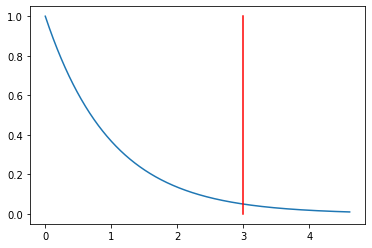

Так как наблюдаемое значение F-статистики (7.2685) больше чем F-критическое(2.9985), то нулевая гипотеза отвергается.


In [14]:
Ramsay_test(βaux_, β_, R2aux, R2, n_obs)